# Homework: List of planets with mass and distance, Center of Mass for each system
### 1. read the file from exoplanet.eu
List of planets from exoplanet.eu 

In [3]:
import pandas as pd 
import numpy as np

data_ep = pd.read_csv('data/exoplanet.eu_catalog.csv', 
                      usecols=['mass','mass_error_min','semi_major_axis',
                               'semi_major_axis_error_min','star_name',
                               'star_metallicity','star_metallicity_error_min'])
#data_ep
data_ep.count()

mass                          1667
mass_error_min                1473
semi_major_axis               2349
semi_major_axis_error_min     1348
star_name                     3820
star_metallicity              3425
star_metallicity_error_min    2524
dtype: int64

**Remember**: `pd.notnull("name_of_column")` deletes the NaN values in the column. 

**Remember**: `data=data[['column_a','column_b',..,'column_n',]]` to get a new order in the DataFrame

Now is necessary processing the data with the prurpose to obtain the Center of Mass CM, `data1` is a DataFrame without the NaN values of _mass_ and _semi major axis_. Finally, we get 1667 rows.

In [10]:
data = data_ep[pd.notnull(data_ep["mass"])]
dataa = data[pd.notnull(data["semi_major_axis"])]
data1 = dataa[['star_name','mass','semi_major_axis']]
#data1

#data2 = data_ep.dropna()
#data2

So, `data2` is a DataFrame without the NaN values of mass, semi major axis and their uncertainties. Finally, we get 1220 rows, 447 rows less than `data1`. 

For the semi major axes column, withouth NaN values we have `data3`, it is usefull for planetary systems with one planet observed.

In [11]:
data3 = data_ep[pd.notnull(data_ep["semi_major_axis"])]
data3 = data3[pd.notnull(data3["star_name"])]
data3 = data3[['star_name',"semi_major_axis"]]
#data3
#data3.groupby("star_name").count()

### 2. Center of Mass 
We need to estimate the CM for each planet, so:
\begin{equation*}
\text{CM} = \frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{\sum \limits_{k=1}^{n}m_{k}} %=\frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{M_{T}}
\end{equation*}
For do it, is nessesary get the values CM for each planet, so with the columns of `mass` and distance from the star  `semi_major_axis` we can get $\boxed{m_{k}\vec{r_{k}}}$ values.

#### For `data1`: #### 
The CM:

In [12]:
r_i = data1["semi_major_axis"]
m_i = data1["mass"]
#the multiplications between columns:
rm_i = r_i.multiply(m_i)
data1 = data1.assign(CM_i=rm_i.values) #New colimn in DataFrame with CM value, per each planet in the system. 
p_system = data1.groupby("star_name")
#data1
#p_system.count()

In [13]:
(np.isnan(data1.CM_i)).sum()

0

**Remember:** The `data.groupby("key")` split the data in groups which are the key.

**Remember:** The `data[i].multiply(data[j])` multiplies the comun i and j of DataFrame or Series i and j, row by row.

**Remember:** The `data.groupby.groups.keys()` get the keys of the split data.

However, the calculus of the CM, counting the planetary systems with the same satar. 

In [14]:
M_total = p_system["mass"].sum()#.tolist() changes from Series to list
sum_rm = p_system['CM_i'].sum()#.tolist()
CM = sum_rm.divide(M_total) #total center of mass, for each extraplanetary system

system = list(data1.groupby("star_name").groups.keys())

print(len(p_system),len(CM),len(M_total))

data1 = pd.DataFrame({'system_name':system,'total_mass':M_total.tolist(),'center_of_Mass':CM.tolist()})
#data1 #the data after get the Center of Mass for each system 

1205 1205 1205


### 3. Gaussian Mixture Model
#### Center of Mass

In [15]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline

#gmm = GaussianMixture(2, covariance_type='full', random_state=0)
#A=data1[["total_mass","center_of_Mass"]]
#gmm.fit(A.values)
#cluster_label = gmm.predict(A.values)
#A.values[:, 0]
#plt.scatter(A.values[:, 0], A.values[:, 1], c=cluster_label);

(-0.1, 1)

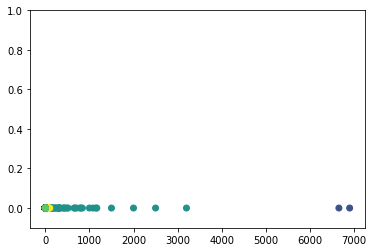

In [18]:
gmm = GaussianMixture(5, covariance_type='full', random_state=0)
A=data1[["center_of_Mass"]]
gmm.fit(A.values)
cluster_label = gmm.predict(A.values)
A.values[:, 0]
plt.scatter((A.values),np.zeros(len(A)), c=cluster_label);
plt.ylim(-0.1,1)

In [19]:
bic=[]
for i in range(10):
    i+=1
    gmm = GaussianMixture(i, covariance_type='full', random_state=0)
    A=np.log10(data1[["center_of_Mass"]])
    gmm.fit(A.values)
    bic+=[gmm.bic(A.values)]

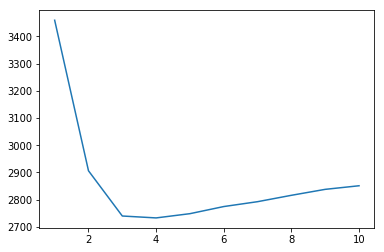

In [20]:
plt.plot(range(1,11),bic)

In [42]:
bic

[3459.1731171634515,
 2906.2739879430114,
 2740.12522789205,
 2733.1384313360463,
 2748.732030165545,
 2774.8868630886363,
 2792.7782461414713,
 2816.193184452781,
 2838.0666938618338,
 2851.26094663473]

(-0.1, 1)

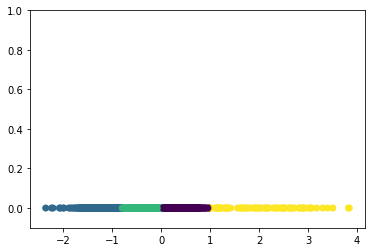

In [21]:
gmm = GaussianMixture(4, covariance_type='full', random_state=0)
A=np.log10(data1[["center_of_Mass"]])
gmm.fit(A.values)
cluster_label = gmm.predict(A.values)
A.values[:, 0]
plt.scatter((A.values),np.zeros(len(A)), c=cluster_label);
plt.ylim(-0.1,1)

In [22]:
gmm.means_

array([[ 0.34963506],
       [-1.30543662],
       [-0.1755601 ],
       [ 1.99563537]])

In [23]:
from scipy.stats import norm

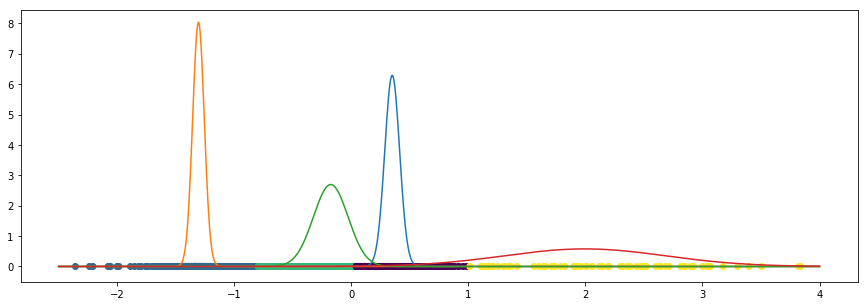

In [24]:
plt.figure(figsize=(15,5))
sma=np.linspace(-2.5,4,1000)
for m,s in zip(gmm.means_,gmm.covariances_):
    plt.plot(sma, norm.pdf(sma,m,s)[0])
plt.scatter((A.values),np.zeros(len(A)), c=cluster_label);

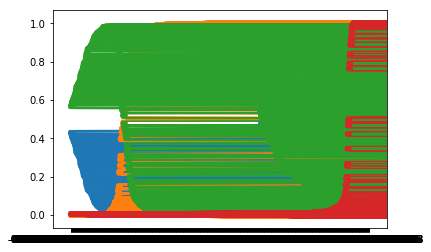

In [29]:
for i in range(4):
    plt.scatter(A,gmm.predict_proba(A)[:,i])

#### Metallicity

In [46]:
dataMet = data_ep[pd.notnull(data_ep["star_metallicity"])]
dataMetA = dataMet[pd.notnull(dataMet["star_metallicity_error_min"])]
dataMet = dataMetA[['star_name',"star_metallicity","star_metallicity_error_min"]]

(-0.1, 1)

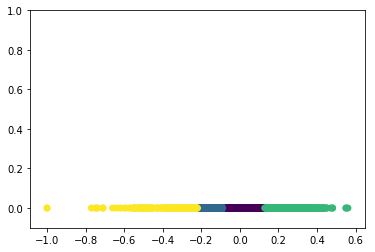

In [49]:
gmm2 = GaussianMixture(4, covariance_type='full', random_state=0)
B=dataMet[["star_metallicity"]]
gmm2.fit(B.values)
cluster_label = gmm2.predict(B.values)
B.values[:, 0]
plt.scatter((B.values),np.zeros(len(B)), c=cluster_label);
plt.ylim(-0.1,1)

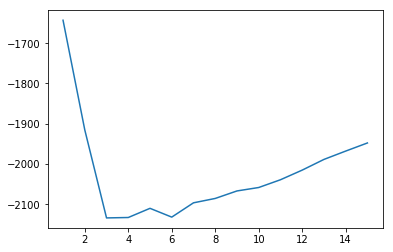

In [53]:
bic=[]
for i in range(15):
    i+=1
    gmm2 = GaussianMixture(i, covariance_type='full', random_state=0)
    A=data1[["center_of_Mass"]]
    gmm2.fit(B.values)
    bic+=[gmm2.bic(B.values)]
plt.plot(range(1,16),bic)

In [ ]:
plt.figure(figsize=(15,5))
sma=np.linspace(-2.5,4,1000)
for m,s in zip(gmm.means_,gmm.covariances_):
    plt.plot(sma, norm.pdf(sma,m,s)[0])
plt.scatter((A.values),np.zeros(len(A)), c=cluster_label);